In [1]:
from keras.layers import Input, Dense
from keras.models import Model


# size of encoded representations
encoding_dim = 32


# input placeholder
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded- lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#Fitting the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/5
47/47 [==============================] - 1s 11ms/step - loss: 0.5620 - accuracy: 0.0018 - val_loss: 0.4619 - val_accuracy: 0.0020
Epoch 2/5
47/47 [==============================] - 0s 7ms/step - loss: 0.4227 - accuracy: 0.0042 - val_loss: 0.3970 - val_accuracy: 0.0040
Epoch 3/5
47/47 [==============================] - 0s 7ms/step - loss: 0.3823 - accuracy: 0.0075 - val_loss: 0.3752 - val_accuracy: 0.0150
Epoch 4/5
47/47 [==============================] - 0s 6ms/step - loss: 0.3646 - accuracy: 0.0072 - val_loss: 0.3605 - val_accuracy: 0.0110
Epoch 5/5
47/47 [==============================] - 0s 7ms/step - loss: 0.3514 - accuracy: 0.0098 - val_loss: 0.3493 - val_accuracy: 0.0080


In [3]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

32/32 [==============================] - 0s 1ms/step


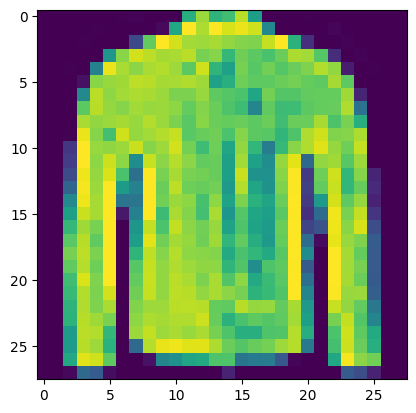

In [4]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

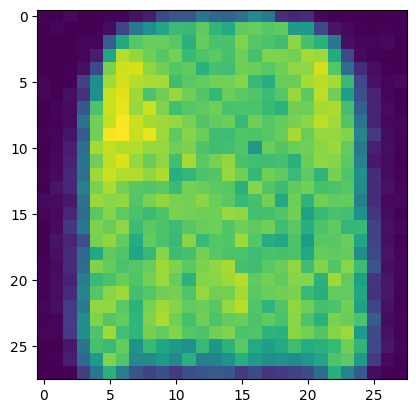

In [5]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [6]:
# ADDING ONE MORE HIDDEN LAYER

input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 13s 25ms/step - loss: 0.3230 - accuracy: 0.0143 - val_loss: 0.2926 - val_accuracy: 0.0202
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2860 - accuracy: 0.0204 - val_loss: 0.2846 - val_accuracy: 0.0218
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.2803 - accuracy: 0.0240 - val_loss: 0.2807 - val_accuracy: 0.0252
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2771 - accuracy: 0.0274 - val_loss: 0.2780 - val_accuracy: 0.0287
Epoch 5/5
469/469 [==============================] - 11s 24ms/step - loss: 0.2750 - accuracy: 0.0310 - val_loss: 0.2763 - val_accuracy: 0.0308


313/313 [==============================] - 1s 3ms/step


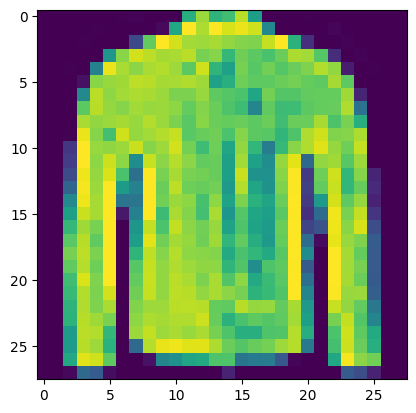

In [7]:
# Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

#predicting on the test data
prediction = autoencoder.predict(x_test)

#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

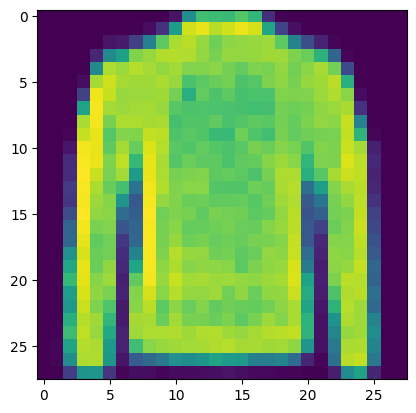

In [8]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [9]:
# Repeat the question 2 on the denoisening autoencoder

from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
     # this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [10]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [11]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 [==============================] - 1s 17ms/step - loss: 0.6280 - accuracy: 0.0017 - val_loss: 0.5348 - val_accuracy: 0.0030
Epoch 2/10
24/24 [==============================] - 0s 11ms/step - loss: 0.4934 - accuracy: 0.0017 - val_loss: 0.4521 - val_accuracy: 0.0010
Epoch 3/10
24/24 [==============================] - 0s 10ms/step - loss: 0.4307 - accuracy: 0.0065 - val_loss: 0.4095 - val_accuracy: 0.0060
Epoch 4/10
24/24 [==============================] - 0s 11ms/step - loss: 0.4025 - accuracy: 0.0068 - val_loss: 0.3919 - val_accuracy: 0.0030
Epoch 5/10
24/24 [==============================] - 0s 10ms/step - loss: 0.3884 - accuracy: 0.0077 - val_loss: 0.3795 - val_accuracy: 0.0030
Epoch 6/10
24/24 [==============================] - 0s 12ms/step - loss: 0.3773 - accuracy: 0.0085 - val_loss: 0.3685 - val_accuracy: 0.0070
Epoch 7/10
24/24 [==============================] - 0s 10ms/step - loss: 0.3683 - accuracy: 0.0082 - val_loss: 0.3594 - val_accuracy: 0.0060
Epoch 8/10
24

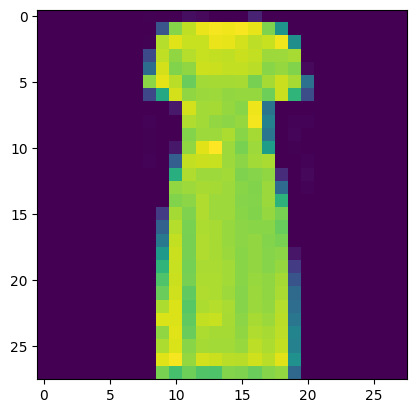

In [12]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

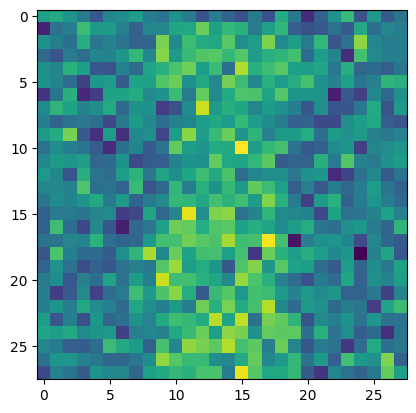

In [13]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

32/32 [==============================] - 0s 2ms/step


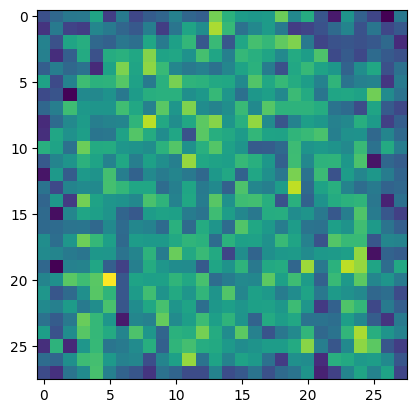

In [14]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()


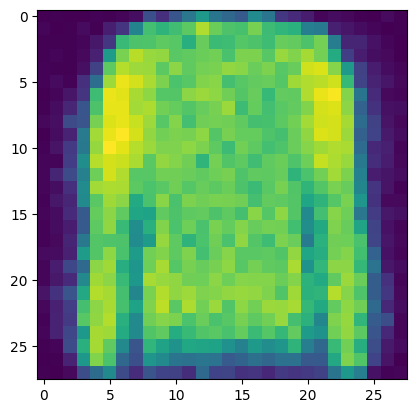

In [15]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

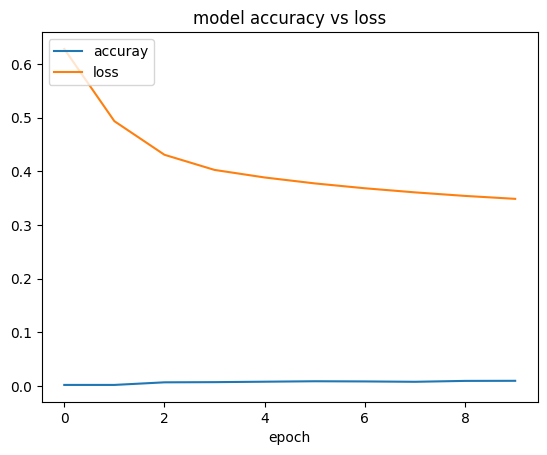

In [16]:
# plot loss and accuracy using the history object

autoencoder.metrics_names

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()